# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define units as metric
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | nuuk
Processing Record 3 of Set 1 | mahibadhoo
Processing Record 4 of Set 1 | zheleznodorozhnyy
Processing Record 5 of Set 1 | coyhaique
Processing Record 6 of Set 1 | newberry
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | sydney mines
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | al bawiti
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | bridgewater
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | sinabang
Processing Record 16 of Set 1 | astrakhan
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | hadibu
Processing Record 19 of Set 1 | port augusta
Processing Record 20 of Set 1 | mundwa
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | port-aux-francais
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,17.79,70,62,2.68,NZ,1712031457
1,nuuk,64.1835,-51.7216,-1.66,86,52,5.14,GL,1712031230
2,mahibadhoo,3.7833,72.9667,28.97,68,91,1.91,MV,1712031459
3,zheleznodorozhnyy,55.7503,38.0042,11.87,75,33,4.02,RU,1712031459
4,coyhaique,-45.5752,-72.0662,7.34,87,0,2.06,CL,1712031207


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,17.79,70,62,2.68,NZ,1712031457
1,nuuk,64.1835,-51.7216,-1.66,86,52,5.14,GL,1712031230
2,mahibadhoo,3.7833,72.9667,28.97,68,91,1.91,MV,1712031459
3,zheleznodorozhnyy,55.7503,38.0042,11.87,75,33,4.02,RU,1712031459
4,coyhaique,-45.5752,-72.0662,7.34,87,0,2.06,CL,1712031207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

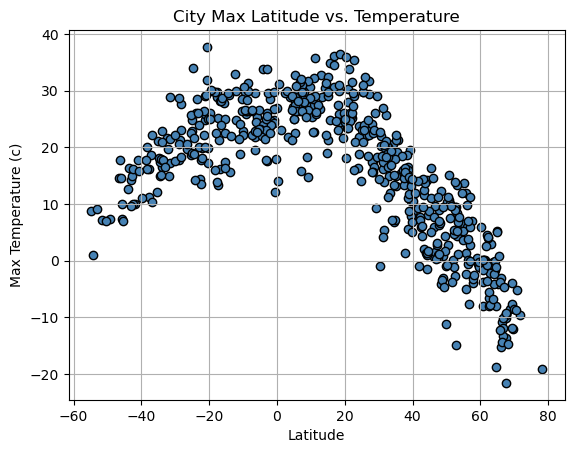

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.title ('City Max Latitude vs. Temperature') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

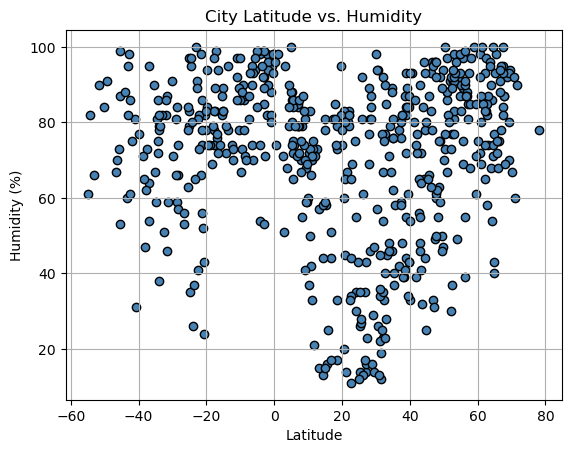

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('City Latitude vs. Humidity') 
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

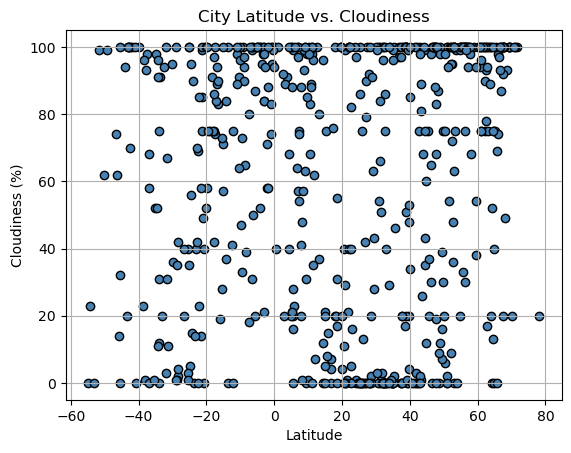

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('City Latitude vs. Cloudiness') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

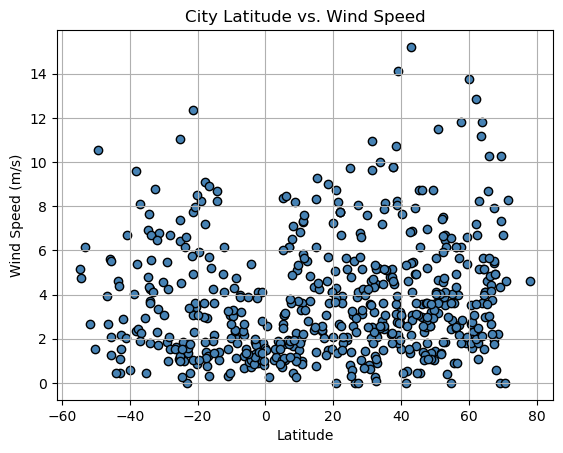

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title ('City Latitude vs. Wind Speed') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Calculate the line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Plot the scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

    # Print r value
    print(f"The r-value for {hemisphere} Hemisphere is: {rvalue**2}")
    plt.show()


In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nuuk,64.1835,-51.7216,-1.66,86,52,5.14,GL,1712031230
2,mahibadhoo,3.7833,72.9667,28.97,68,91,1.91,MV,1712031459
3,zheleznodorozhnyy,55.7503,38.0042,11.87,75,33,4.02,RU,1712031459
5,newberry,34.2746,-81.6187,20.64,79,100,2.81,US,1712031434
7,sydney mines,46.2367,-60.2177,0.75,83,98,3.58,CA,1712031462


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,17.79,70,62,2.68,NZ,1712031457
4,coyhaique,-45.5752,-72.0662,7.34,87,0,2.06,CL,1712031207
6,ancud,-41.8697,-73.8203,9.94,75,100,2.90,CL,1712031461
8,blackmans bay,-43.0167,147.3167,14.29,95,100,0.45,AU,1712031286
10,port mathurin,-19.6833,63.4167,26.11,84,58,5.93,MU,1712031463


###  Temperature vs. Latitude Linear Regression Plot

The r-value for Northern Hemisphere is: 0.8027018319315528


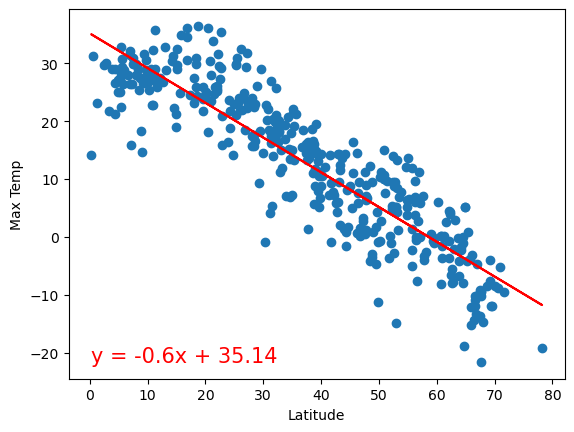

In [48]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Max Temp']
plot_linear_regression(x_values_northern, y_values_northern, "Northern")

The r-value for Southern Hemisphere is: 0.42811085706506824


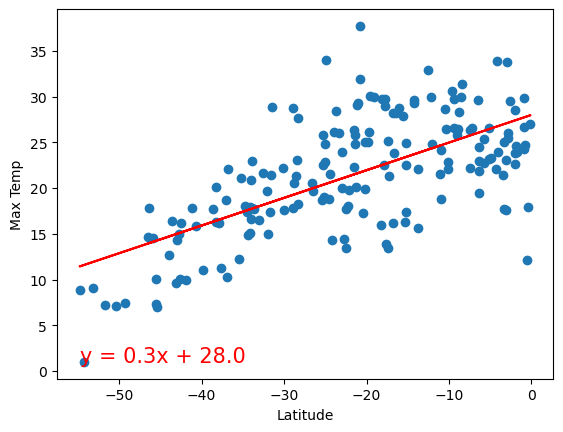

In [49]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Max Temp']
plot_linear_regression(x_values_southern, y_values_southern, "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE